In [7]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [8]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_corridor


# maze = gym.make('corridor-100-v0')
maze = gym.make('corridor-40-v0')
# maze = gym.make('corridor-20-v0')

maze.reset()
maze.render()


[........................X..............$]


In [22]:
from lcs.agents.xcs import XCS, Configuration


# TODO: fix it.
def xcs_corridor_knowledge(xcs: XCS, environment):
    nr_correct = 0
    position = 0
    while environment.observation_space.contains(position):
        if any([True for cl in xcs.population if cl.does_match(str(position)) and
                                                 cl.action == 1 and
                                                 cl.wildcard_number() == 0]):
            nr_correct += 1
        position += 1
    return nr_correct / position


def xcs_corridor_metrics(xcs: XCS, environment):
    return {
        'population': len(xcs.population),
        'knowledge': xcs_corridor_knowledge(xcs, environment),
        'numerosity': sum(cl.numerosity for cl in xcs.population)
    }


cfg = Configuration(number_of_actions=2,
                    metrics_trial_frequency=10,
                    user_metrics_collector_fcn=xcs_corridor_metrics)

agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 1000, False)

for cl in explore_population:
    print(str(cl))


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 200, 'reward': 1.5618103297941461e-40, 'population': 54, 'knowledge': 0.675, 'numerosity': 114}


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 43, 'reward': 100.00364874878716, 'population': 73, 'knowledge': 0.925, 'numerosity': 196}


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 18, 'reward': 100.00053944255603, 'population': 76, 'knowledge': 0.9, 'numerosity': 198}


INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 107, 'reward': 100.00157202300443, 'population': 77, 'knowledge': 0.95, 'numerosity': 197}


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 1, 'reward': 100.0, 'population': 74, 'knowledge': 0.85, 'numerosity': 201}


INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 67, 'reward': 100.02051883085738, 'population': 68, 'knowledge': 0.775, 'numerosity': 198}


INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 56, 'reward': 100.00001590031528, 'population': 72, 'knowledge': 0.875, 'numerosity': 196}


INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 33, 'reward': 100.05636437612422, 'population': 75, 'knowledge': 0.95, 'numerosity': 198}


INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 28, 'reward': 100.0133735184422, 'population': 77, 'knowledge': 0.925, 'numerosity': 193}


INFO:lcs.agents.Agent:{'trial': 900, 'steps_in_trial': 14, 'reward': 100.04553394579352, 'population': 67, 'knowledge': 0.65, 'numerosity': 199}


Cond:6 - Act:0 - Num:3 [fit: 0.001, exp: 38.00, pred: 0.029771]
Cond:2 - Act:1 - Num:3 [fit: 0.000, exp: 46.00, pred: 0.001800]
Cond:3 - Act:1 - Num:1 [fit: 0.000, exp: 51.00, pred: 0.009389]
Cond:2 - Act:0 - Num:1 [fit: 0.009, exp: 17.00, pred: 0.000082]
Cond:1 - Act:1 - Num:3 [fit: 0.002, exp: 32.00, pred: 0.000257]
Cond:1 - Act:0 - Num:1 [fit: 0.022, exp: 9.00, pred: 0.000067]
Cond:23 - Act:0 - Num:1 [fit: 0.000, exp: 95.00, pred: 3.222460]
Cond:0 - Act:0 - Num:1 [fit: 0.033, exp: 5.00, pred: 0.000042]
Cond:0 - Act:1 - Num:1 [fit: 0.016, exp: 12.00, pred: 0.000087]
Cond:5 - Act:0 - Num:1 [fit: 0.009, exp: 17.00, pred: 0.002212]
Cond:3 - Act:0 - Num:1 [fit: 0.033, exp: 5.00, pred: 0.000399]
Cond:37 - Act:0 - Num:1 [fit: 0.000, exp: 78.00, pred: 13.933987]
Cond:27 - Act:0 - Num:3 [fit: 0.000, exp: 71.00, pred: 3.457409]
Cond:34 - Act:1 - Num:5 [fit: 0.005, exp: 23.00, pred: 7.584996]
Cond:29 - Act:1 - Num:3 [fit: 0.017, exp: 11.00, pred: 4.326825]
Cond:35 - Act:1 - Num:1 [fit: 0.013, 

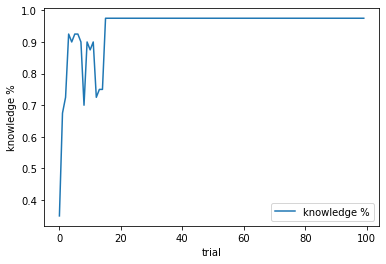

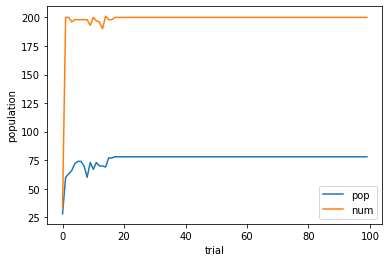

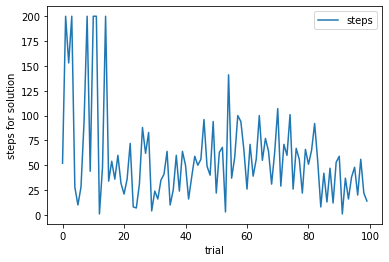

In [20]:
import pandas as pd

df = pd.DataFrame(metric["knowledge"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")
ax.legend(["knowledge %"])


df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])





